In [1]:
pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 330.3 kB/s eta 0:06:19
   ---------------------------------------- 0.0/124.9 MB 281.8 kB/s eta 0:07:24
   ---------------------------------------- 0.1/124.9 MB 512.0 kB/s eta 0:04:04
   ---------------------------------------- 0.2/124.9 MB 756.6 kB/s eta 0:02:45
   ---------------------------------------- 0.3/124.9 MB 1.0 MB/s eta 0:02:00
   ---------------------------------------- 0.4/124.9 MB 1.2 MB/s eta 0:01:43
   ---------------------------------------- 0.5/124.9 MB 1.3 MB/s eta 0:01:33
   ---------------------------------------- 0.8/124.9 MB 2.1 MB/s eta 0:01:00
    --------------------------------------- 1.6/124.9 MB 3.4 MB/s eta 0:00:37
    --------------------------------------- 2.1/124.9 MB 4.2 MB/s eta 0:00:29
    --------------------------------------- 2.3/124.9 MB 4.2 MB/s eta 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [3]:
from xgboost import XGBRegressor  # Use XGBClassifier for classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [4]:
df = pd.read_csv(r'C:\Users\online\Downloads\Crop Production Data India1.0 (1).csv')
df

,Region,Soil_Type,Crop,Temperature_Celsius,Rainfall_mm,Water_require(Llit in lacs/hec),Weather_Condition,Soil_pH,N(Nitrogen),P(Phosphorus),K(Potassium),Irrigation_Used,Fertilizer_Used,Days_to_Harvest,Crop Yield(Ton/Hector)
0,West,Sandy,Cotton,27.676966,897.077239,90.0,Cloudy,6.75,55.0,44.0,36.0,True,False,122,6.555816
1,South,Clay,Rice,18.026142,992.673282,155.0,Rainy,6.25,78.0,60.0,44.0,True,True,140,8.527341
2,North,Loam,Barley,29.794042,147.998025,35.0,Sunny,6.50,70.0,60.0,50.0,False,False,106,1.127443
3,North,Sandy,Soybean,16.644190,986.866331,57.5,Rainy,6.75,45.0,40.0,33.0,True,False,146,6.517573
4,South,Silt,Wheat,31.620687,730.379174,37.5,Cloudy,6.50,140.0,50.0,95.0,True,True,110,7.248251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299994,East,Loam,Wheat,28.734643,362.534938,40.0,Rainy,6.50,77.0,60.0,45.0,True,False,124,3.571021
299995,North,Clay,Soybean,31.462327,156.297529,45.0,Rainy,6.25,54.0,50.0,44.0,False,True,97,3.351253
299996,North,Sandy,Soybean,24.308284,724.716503,57.5,Sunny,6.75,45.0,40.0,33.0,False,True,133,5.621784
299997,South,Clay,Rice,38.607461,389.026474,155.0,Sunny,6.25,78.0,60.0,44.0,True,False,146,3.943068


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299999 entries, 0 to 299998
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Region                           299999 non-null  object 
 1   Soil_Type                        299999 non-null  object 
 2   Crop                             299999 non-null  object 
 3   Temperature_Celsius              299999 non-null  float64
 4   Rainfall_mm                      299999 non-null  float64
 5   Water_require(Llit in lacs/hec)  299999 non-null  float64
 6   Weather_Condition                299999 non-null  object 
 7   Soil_pH                          299999 non-null  float64
 8   N(Nitrogen)                      299998 non-null  float64
 9   P(Phosphorus)                    299999 non-null  float64
 10  K(Potassium)                     299999 non-null  float64
 11  Irrigation_Used                  299999 non-null  bool   
 12  Fe

In [6]:
df.corr

<bound method DataFrame.corr of        Region Soil_Type     Crop  Temperature_Celsius  Rainfall_mm  \
0        West     Sandy   Cotton            27.676966   897.077239   
1       South      Clay     Rice            18.026142   992.673282   
2       North      Loam   Barley            29.794042   147.998025   
3       North     Sandy  Soybean            16.644190   986.866331   
4       South      Silt    Wheat            31.620687   730.379174   
...       ...       ...      ...                  ...          ...   
299994   East      Loam    Wheat            28.734643   362.534938   
299995  North      Clay  Soybean            31.462327   156.297529   
299996  North     Sandy  Soybean            24.308284   724.716503   
299997  South      Clay     Rice            38.607461   389.026474   
299998  North      Loam    Wheat            21.165766   435.387328   

        Water_require(Llit in lacs/hec) Weather_Condition  Soil_pH  \
0                                  90.0            Cloudy

In [7]:
df.dtypes

Region                              object
Soil_Type                           object
Crop                                object
Temperature_Celsius                float64
Rainfall_mm                        float64
Water_require(Llit in lacs/hec)    float64
Weather_Condition                   object
Soil_pH                            float64
N(Nitrogen)                        float64
P(Phosphorus)                      float64
K(Potassium)                       float64
Irrigation_Used                       bool
Fertilizer_Used                       bool
Days_to_Harvest                      int64
Crop Yield(Ton/Hector)             float64
dtype: object

In [8]:
df.describe(include='all')

,Region,Soil_Type,Crop,Temperature_Celsius,Rainfall_mm,Water_require(Llit in lacs/hec),Weather_Condition,Soil_pH,N(Nitrogen),P(Phosphorus),K(Potassium),Irrigation_Used,Fertilizer_Used,Days_to_Harvest,Crop Yield(Ton/Hector)
count,299999,299999,299999,299999.000000,299999.000000,299999.000000,299999,299999.00000,299998.000000,299999.000000,299999.000000,299999,299999,299999.000000,299999.000000
unique,4,6,6,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,2,2,NaN,NaN
top,East,Clay,Cotton,NaN,NaN,NaN,Sunny,NaN,NaN,NaN,NaN,False,False,NaN,NaN
freq,75330,50121,50123,NaN,NaN,NaN,100296,NaN,NaN,NaN,NaN,150020,150184,NaN,NaN
mean,NaN,NaN,NaN,27.521169,549.707798,67.836959,NaN,6.35070,77.746892,54.531005,66.888441,NaN,NaN,104.454425,4.647911
std,NaN,NaN,NaN,7.213242,259.756749,33.938765,NaN,0.45191,33.426273,9.501612,40.096833,NaN,NaN,25.943356,1.696128
min,NaN,NaN,NaN,15.000041,100.006194,30.000000,NaN,5.50000,25.000000,40.000000,27.000000,NaN,NaN,60.000000,-0.841617
25%,NaN,NaN,NaN,21.273268,324.528766,40.000000,NaN,6.25000,55.000000,49.500000,36.000000,NaN,NaN,82.000000,3.417055
50%,NaN,NaN,NaN,27.555620,550.381990,65.000000,NaN,6.50000,66.000000,50.000000,48.000000,NaN,NaN,104.000000,4.648246
75%,NaN,NaN,NaN,33.770770,773.855506,77.500000,NaN,6.75000,84.000000,60.000000,95.000000,NaN,NaN,127.000000,5.874523


In [9]:
df.columns

Index(['Region', 'Soil_Type', 'Crop', 'Temperature_Celsius', 'Rainfall_mm',
       'Water_require(Llit in lacs/hec)', 'Weather_Condition', 'Soil_pH',
       'N(Nitrogen)', 'P(Phosphorus)', 'K(Potassium)', 'Irrigation_Used',
       'Fertilizer_Used', 'Days_to_Harvest', 'Crop Yield(Ton/Hector)'],
      dtype='object')

In [10]:
df.shape

(299999, 15)

In [11]:
df.size

4499985

In [12]:
df.dropna(inplace=True)

In [13]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
299994    False
299995    False
299996    False
299997    False
299998    False
Length: 299998, dtype: bool

In [14]:
df['N(Nitrogen)'].fillna(77)

0          55.0
1          78.0
2          70.0
3          45.0
4         140.0
          ...  
299994     77.0
299995     54.0
299996     45.0
299997     78.0
299998     77.0
Name: N(Nitrogen), Length: 299998, dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299998 entries, 0 to 299998
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Region                           299998 non-null  object 
 1   Soil_Type                        299998 non-null  object 
 2   Crop                             299998 non-null  object 
 3   Temperature_Celsius              299998 non-null  float64
 4   Rainfall_mm                      299998 non-null  float64
 5   Water_require(Llit in lacs/hec)  299998 non-null  float64
 6   Weather_Condition                299998 non-null  object 
 7   Soil_pH                          299998 non-null  float64
 8   N(Nitrogen)                      299998 non-null  float64
 9   P(Phosphorus)                    299998 non-null  float64
 10  K(Potassium)                     299998 non-null  float64
 11  Irrigation_Used                  299998 non-null  bool   
 12  Fertili

In [16]:
df.isnull().sum()

Region                             0
Soil_Type                          0
Crop                               0
Temperature_Celsius                0
Rainfall_mm                        0
Water_require(Llit in lacs/hec)    0
Weather_Condition                  0
Soil_pH                            0
N(Nitrogen)                        0
P(Phosphorus)                      0
K(Potassium)                       0
Irrigation_Used                    0
Fertilizer_Used                    0
Days_to_Harvest                    0
Crop Yield(Ton/Hector)             0
dtype: int64

In [17]:
df.replace({'Region':{'North':0,'South':1,'East':2,'West':3}},inplace=True)
df.replace({'Soil_Type':{'Sandy':0,'Clay':1,'Loam':2,'Silt':3,'Peaty':4,'Chalky':5}},inplace=True)
df.replace({'Crop':{'Cotton':0,'Rice':1,'Barley':2,'Soybean':3,'Wheat':4,'Maize':5}},inplace=True)
df.replace({'Weather_Condition':{'Cloudy':0,'Rainy':1,'Sunny':2}},inplace=True)

In [18]:
encoder = LabelEncoder()
df['Irrigation_Used']=encoder.fit_transform(df['Irrigation_Used'])
df['Irrigation_Used']

df['Fertilizer_Used']=encoder.fit_transform(df['Fertilizer_Used'])
df['Fertilizer_Used']

0         0
1         1
2         0
3         0
4         1
         ..
299994    0
299995    1
299996    1
299997    0
299998    0
Name: Fertilizer_Used, Length: 299998, dtype: int64

In [19]:
df

,Region,Soil_Type,Crop,Temperature_Celsius,Rainfall_mm,Water_require(Llit in lacs/hec),Weather_Condition,Soil_pH,N(Nitrogen),P(Phosphorus),K(Potassium),Irrigation_Used,Fertilizer_Used,Days_to_Harvest,Crop Yield(Ton/Hector)
0,3,0,0,27.676966,897.077239,90.0,0,6.75,55.0,44.0,36.0,1,0,122,6.555816
1,1,1,1,18.026142,992.673282,155.0,1,6.25,78.0,60.0,44.0,1,1,140,8.527341
2,0,2,2,29.794042,147.998025,35.0,2,6.50,70.0,60.0,50.0,0,0,106,1.127443
3,0,0,3,16.644190,986.866331,57.5,1,6.75,45.0,40.0,33.0,1,0,146,6.517573
4,1,3,4,31.620687,730.379174,37.5,0,6.50,140.0,50.0,95.0,1,1,110,7.248251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299994,2,2,4,28.734643,362.534938,40.0,1,6.50,77.0,60.0,45.0,1,0,124,3.571021
299995,0,1,3,31.462327,156.297529,45.0,1,6.25,54.0,50.0,44.0,0,1,97,3.351253
299996,0,0,3,24.308284,724.716503,57.5,2,6.75,45.0,40.0,33.0,0,1,133,5.621784
299997,1,1,1,38.607461,389.026474,155.0,2,6.25,78.0,60.0,44.0,1,0,146,3.943068


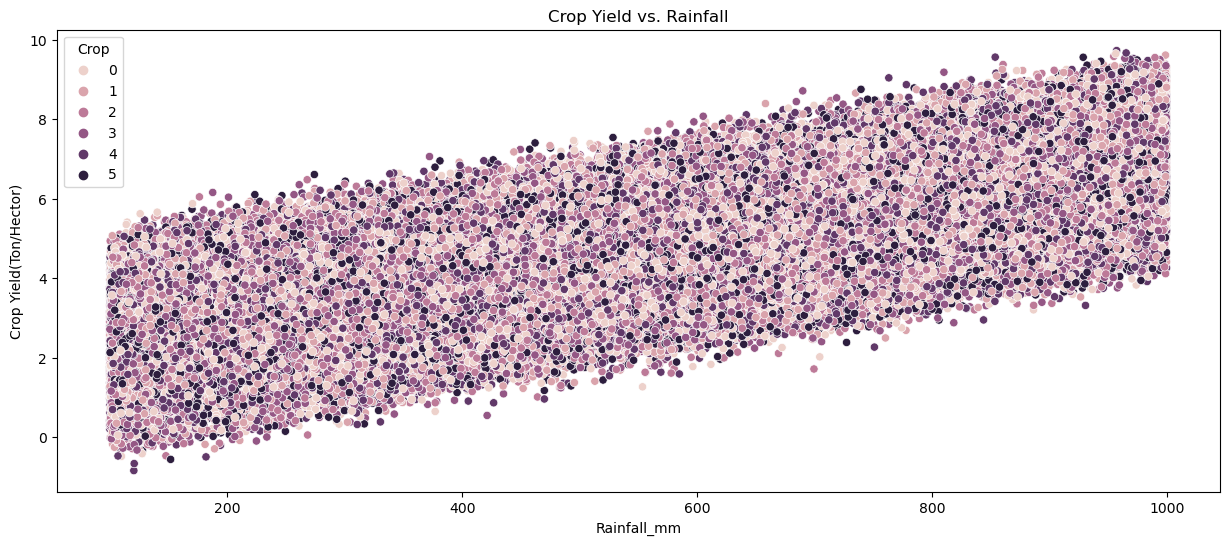

In [20]:
plt.figure(figsize=(15,6))
sns.scatterplot(x='Rainfall_mm', y='Crop Yield(Ton/Hector)', data=df, hue='Crop')
plt.title('Crop Yield vs. Rainfall')
plt.show()

C:\Users\online\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


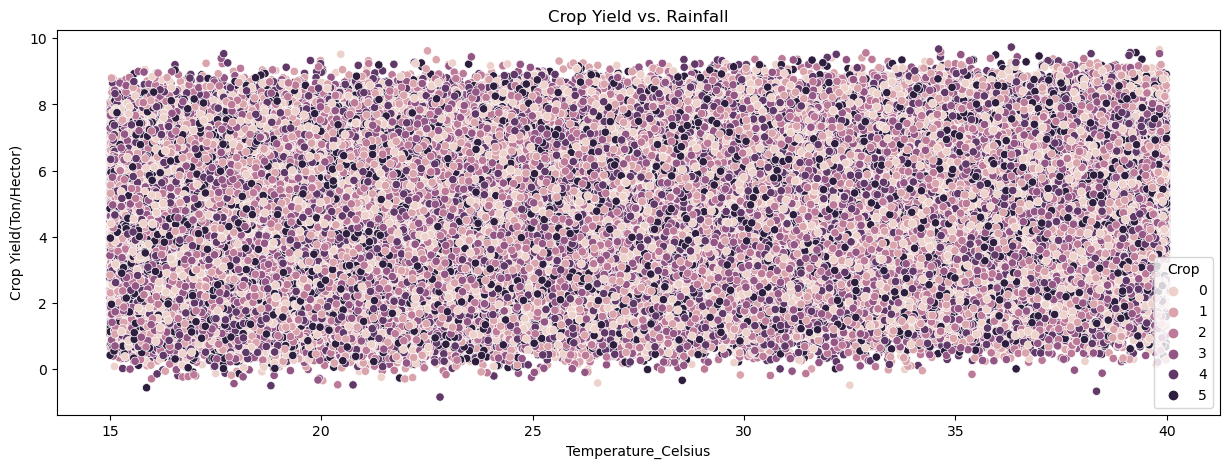

In [21]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='Temperature_Celsius', y='Crop Yield(Ton/Hector)', data=df, hue='Crop')
plt.title('Crop Yield vs. Rainfall')
plt.show()

C:\Users\online\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\online\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\online\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\online\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

<Figure size 1500x800 with 0 Axes>

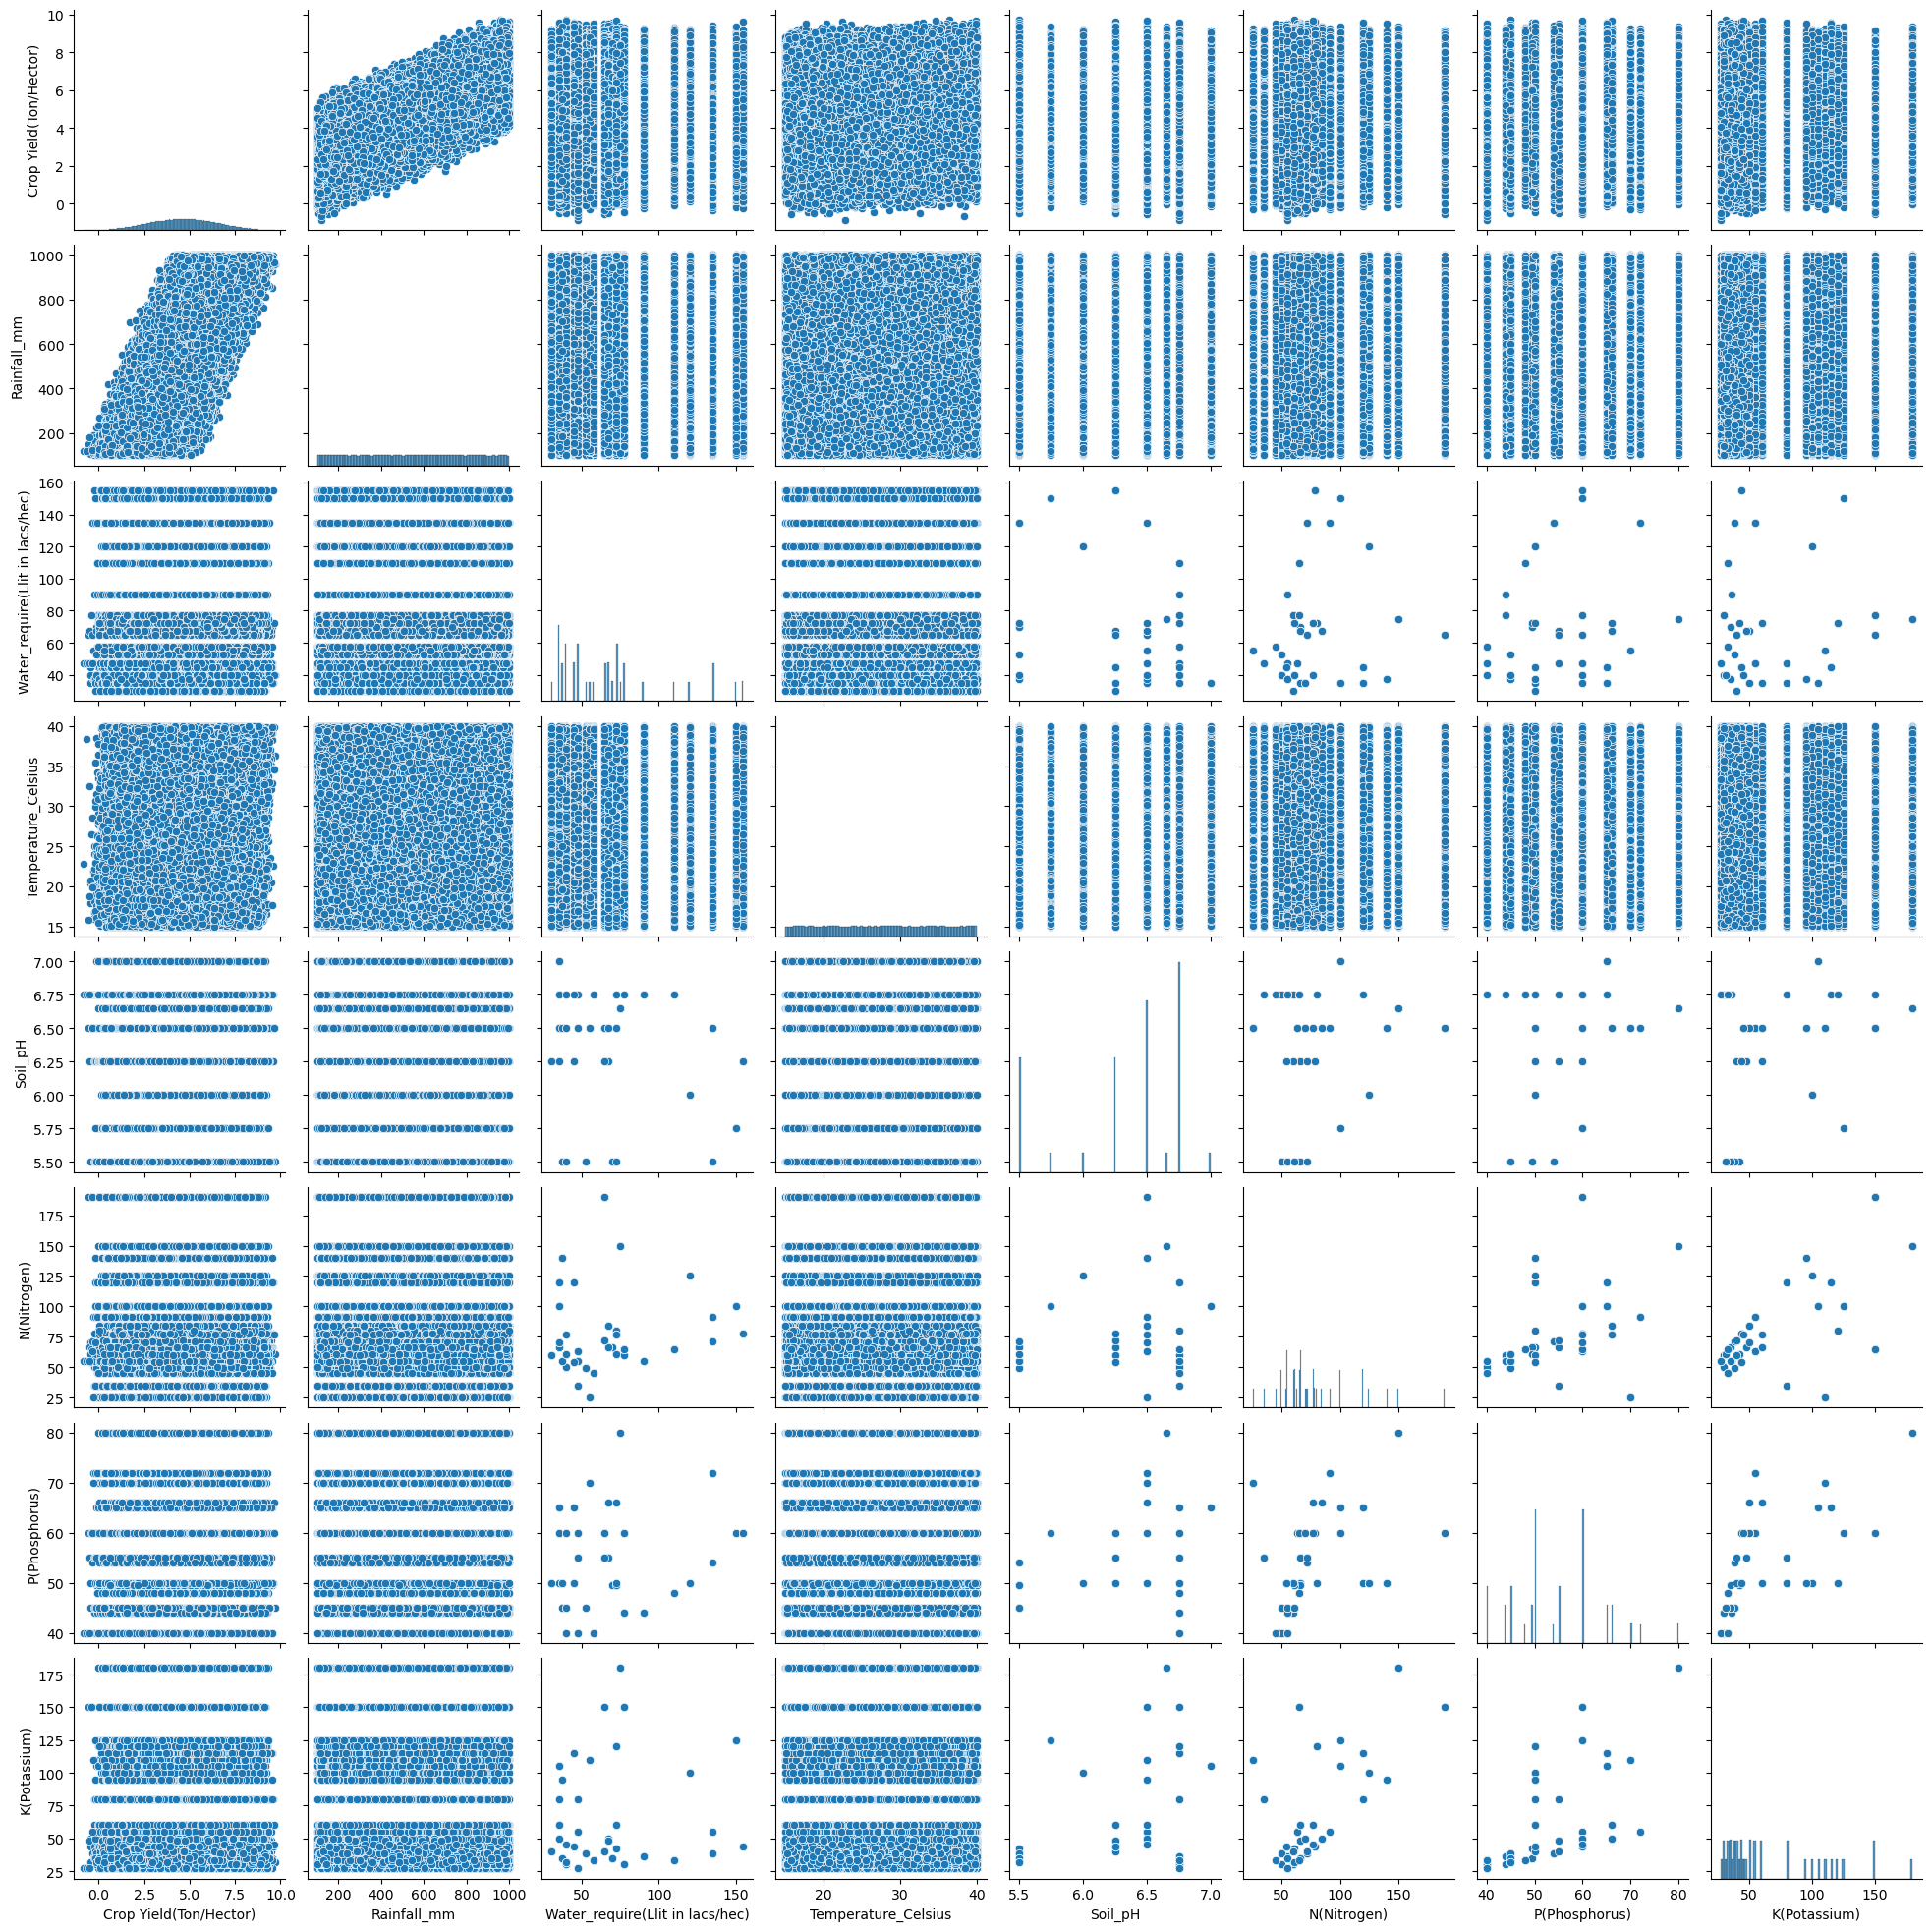

In [22]:
plt.figure(figsize=(15,8))
sns.pairplot(df[['Crop Yield(Ton/Hector)', 'Rainfall_mm','Water_require(Llit in lacs/hec)','Temperature_Celsius','Soil_pH','N(Nitrogen)','P(Phosphorus)','K(Potassium)']])
plt.show()

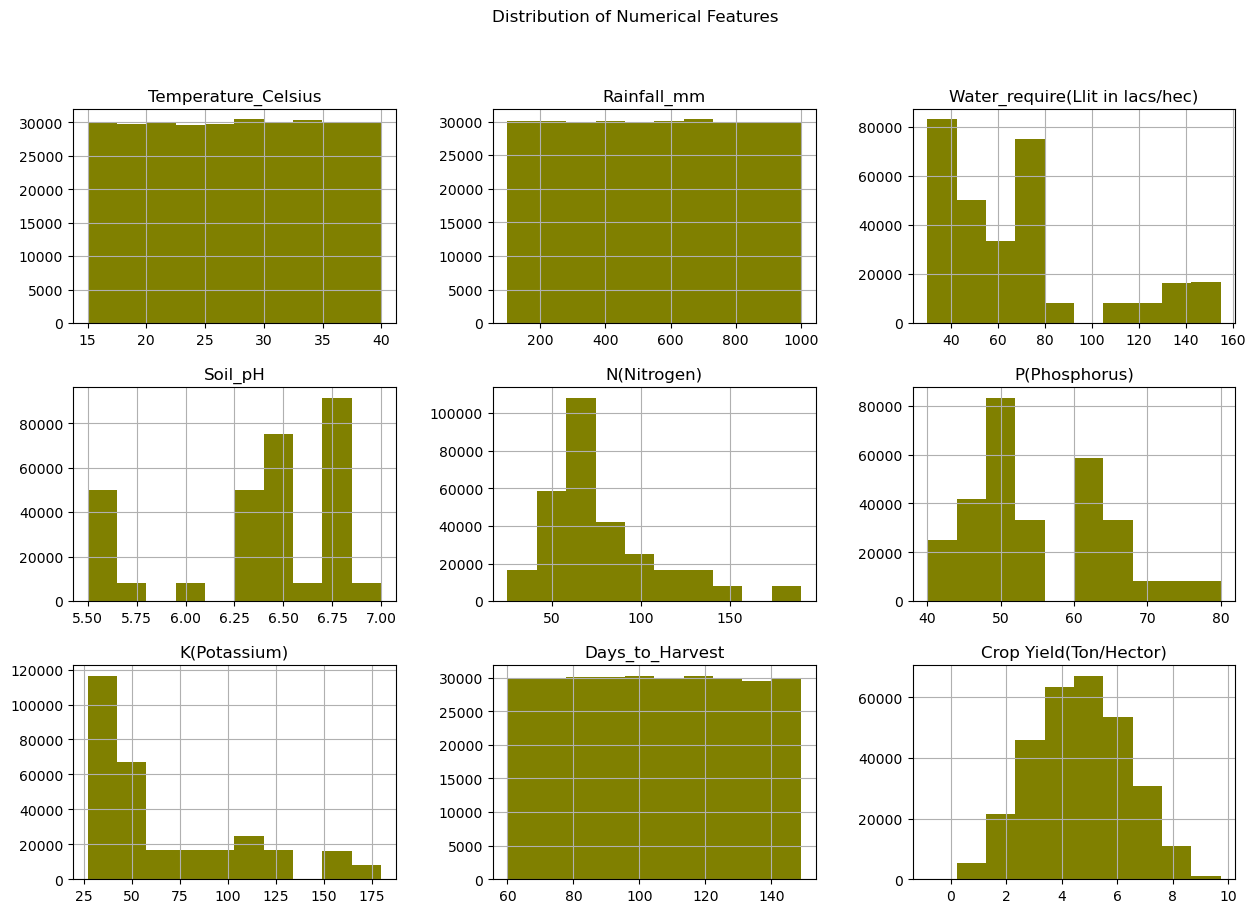

In [23]:
numerical_features = ['Temperature_Celsius', 'Rainfall_mm','Water_require(Llit in lacs/hec)','Soil_pH', 'N(Nitrogen)', 'P(Phosphorus)', 'K(Potassium)', 'Days_to_Harvest', 'Crop Yield(Ton/Hector)']
df[numerical_features].hist(figsize=(15, 10),color='olive')
plt.suptitle('Distribution of Numerical Features')
plt.show()

C:\Users\online\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


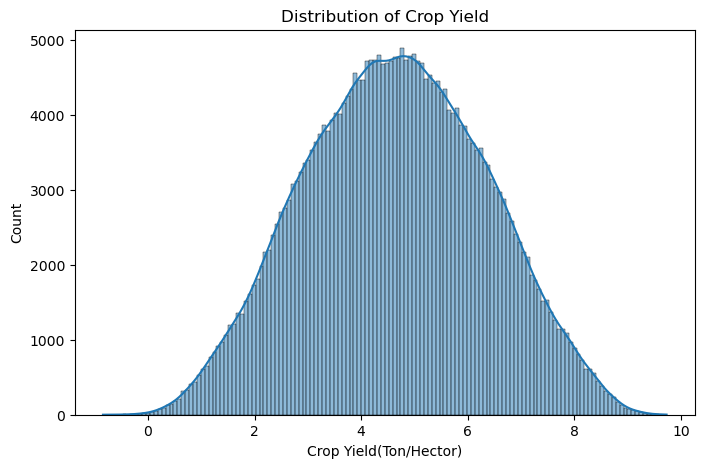

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Crop Yield(Ton/Hector)'], kde=True)
plt.title('Distribution of Crop Yield')
plt.show()

In [25]:
x = df.drop(['Crop Yield(Ton/Hector)'],axis=1)
y = df['Crop Yield(Ton/Hector)']

In [26]:
x.head(1)

,Region,Soil_Type,Crop,Temperature_Celsius,Rainfall_mm,Water_require(Llit in lacs/hec),Weather_Condition,Soil_pH,N(Nitrogen),P(Phosphorus),K(Potassium),Irrigation_Used,Fertilizer_Used,Days_to_Harvest
0,3,0,0,27.676966,897.077239,90.0,0,6.75,55.0,44.0,36.0,1,0,122


In [27]:
y.head(1)

0    6.555816
Name: Crop Yield(Ton/Hector), dtype: float64

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 42)

In [29]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [30]:
trainning_data_prediction = model.predict(x_train)

In [31]:
error_score = metrics.r2_score(y_train,trainning_data_prediction)
print('r Squred error :',error_score)

r Squred error : 0.9140432908582732


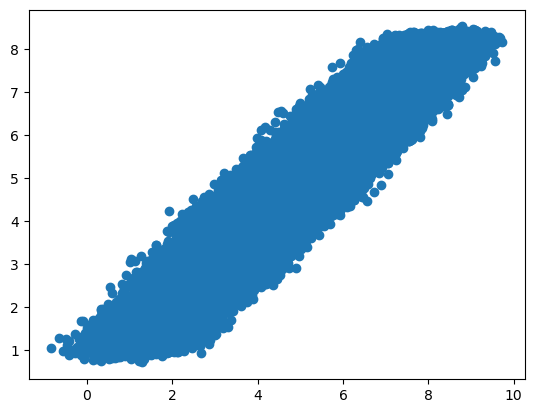

In [32]:
plt.scatter(y_train,trainning_data_prediction)

In [33]:
test_data_prediction = model.predict(x_test)

In [34]:
error_score = metrics.r2_score(y_test,test_data_prediction)
print('R squred error:',error_score)

R squred error: 0.9129589902925098


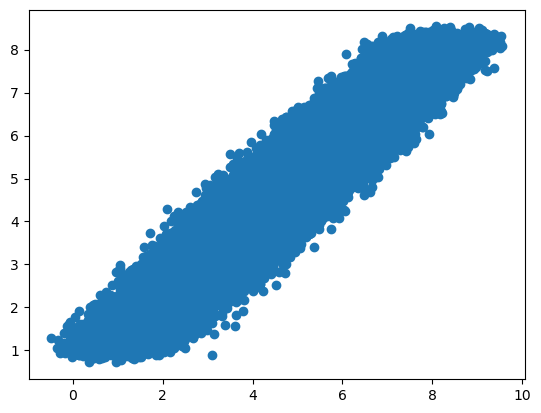

In [35]:
plt.scatter(y_test,test_data_prediction)

In [36]:
print(model.predict([[3,0,0,27.676966,897.077239,90.0,0,6.75,55.0,44.0,36.0,1,0,122]]))

[6.2522154]


In [37]:
import pickle

In [38]:
with open('Agritech.pickle', 'wb') as f:
    pickle.dump(model,f)

In [40]:
with open('Agritech.pickle','rb') as f:
    load_file = pickle.load(f)
    print(load_file)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
